Statistical filtering. 

By careful analysis of noise samples that have been detected as spikes, we found two charac- teristics discriminating noise from the real spikes. The two characteristics are the absolute value of average and std of samples of the waveform. For falsely detected spikes, the std of samples is large and their average is far from zero. Thus, we defined our statistical filtering based on these two parameters. To filter the false alarms, spikes whose absolute value of average and std parameters are greater than a threshold are removed. The empirically calculated thresholds are set to one and three for the average and std, respectively. Intuitively speaking, high std wave-shapes are probably the results of higher noise distortion. As we know, the higher noise power, the higher std of noise.

Thus, high average spike wave-shapes are the results of abnormal spike shapes, such as extremums with high bandwidth. Finally, we note that these properties are also observed experimentally over a range of real recording sessions.

Multi‑point alignment. 

A multi-point aligning procedure is introduced in this section. The proposed proce- dure takes both the minimum and maximum value of the detected spike into account. Assume that spi is the i’th detected spike. First, samples are grouped based on the amplitude of their minimums or maximums, i.e., amin and amax. Samples in which amin < amax are in one group and the other samples are gathered in the other one. The rest of the procedure would be applied to each group separately. Assuming the group where amin < amax, the histogram of the time indices of the maximum values would be calculated as shown in Figure 1b. The histogram is smoothed using a cubic spline interpolation. Then, the mpeak greatest peaks in the histogram would be consid- ered as aligning points (thus, mpeak is the number of selected peaks) (Figure 1b). For each sample in the group, if the maximum of the sample could reach the nearest aligning point by the maximum shift of mshift point, it would be shifted to be aligned with the nearest aligning point (Fig. 1c) (thus, mshift is the maximum allowed shift for aligning). The aligning procedure is illustrated in Figure 1a. There exist two parameters in the alignment process, i.e., mpeak and mshift. Here, we discussed the extreme cases
of these two parameters. When mpeak is one, the procedure seeks to align all spikes into one unique point. In this way, if the difference between two neuron spikes is the index of their extremum, then the alignment misleads the clustering process by removing a discrimination characteristic. The other extreme case is when mpeak is equal to the number of samples. In this scenario, the procedure does not align any waveform. Thus, increasing the value of mpeak reduces the aligning effect. The other parameter is the maximum allowed shift for aligning a sample, i.e., mshift. Small values of this parameter reduce the effect of the alignment. Also, large shifts dramatically change the spike wave-shapes which is not desirable. After alignment, the tails of the spike samples, which do not carry important information about the spike wave-shape would be eliminated.

In [1]:
# ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ paquetes ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~~ #
using Suppressor
using JLD
@suppress begin
    PATHFunctions = "/home/isabel/Dropbox/git-repos/All-Process";
    push!( LOAD_PATH, PATHFunctions );
    using F2023
end
# ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ #

# ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ #
FILEBRW = "/run/media/isabel/Data/Hipocampo/Espontanea/01-06-2022/BRWs/Phase_10.brw";
FILEVARS = FindContent( "Variables.jld", FILEBRW );
PATHANALITICS = joinpath( dirname( FindContent( "Info", FILEBRW )[ 1 ] ), "Analitics" );
PATHDISCARDED = joinpath( PATHANALITICS, "Discarded" );
# ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ #
FILESVOLTAGE = FindContent( "Voltage", FILEBRW );
FILESDISCARDED = FindContent( "Discarded", FILEBRW );
Variables = LoadDict( FILEVARS );
Σ = length( FILESVOLTAGE );
# ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ #

In [4]:
FILESVOLTAGE

45-element Vector{Any}:
 "/run/media/isabel/Data/Hipocamp" ⋯ 19 bytes ⋯ "2022/Phase_10/Voltage/BIN01.jld"
 "/run/media/isabel/Data/Hipocamp" ⋯ 19 bytes ⋯ "2022/Phase_10/Voltage/BIN02.jld"
 "/run/media/isabel/Data/Hipocamp" ⋯ 19 bytes ⋯ "2022/Phase_10/Voltage/BIN03.jld"
 "/run/media/isabel/Data/Hipocamp" ⋯ 19 bytes ⋯ "2022/Phase_10/Voltage/BIN04.jld"
 "/run/media/isabel/Data/Hipocamp" ⋯ 19 bytes ⋯ "2022/Phase_10/Voltage/BIN05.jld"
 "/run/media/isabel/Data/Hipocamp" ⋯ 19 bytes ⋯ "2022/Phase_10/Voltage/BIN06.jld"
 "/run/media/isabel/Data/Hipocamp" ⋯ 19 bytes ⋯ "2022/Phase_10/Voltage/BIN07.jld"
 "/run/media/isabel/Data/Hipocamp" ⋯ 19 bytes ⋯ "2022/Phase_10/Voltage/BIN08.jld"
 "/run/media/isabel/Data/Hipocamp" ⋯ 19 bytes ⋯ "2022/Phase_10/Voltage/BIN09.jld"
 "/run/media/isabel/Data/Hipocamp" ⋯ 19 bytes ⋯ "2022/Phase_10/Voltage/BIN10.jld"
 "/run/media/isabel/Data/Hipocamp" ⋯ 19 bytes ⋯ "2022/Phase_10/Voltage/BIN11.jld"
 "/run/media/isabel/Data/Hipocamp" ⋯ 19 bytes ⋯ "2022/Phase_10/Voltage/BIN

In [5]:
# ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ #
σ = 16;
# ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ #
Discarded = LoadDict( FILESDISCARDED[ σ ] );
Empties = Discarded[ "Empties" ];
# ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ #
BIN = Float64.( LoadDict( FILESVOLTAGE[ σ ] ) );
if σ != 1
    BINPRE = Float64.( LoadDict( FILESVOLTAGE[ σ - 1 ] ) );
else
    BINPRE = deepcopy( BIN );
end
if σ != Σ
    BINPOS = Float64.( LoadDict( FILESVOLTAGE[ σ + 1 ] ) );
else
    BINPOS = deepcopy( BIN );
end
# ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ #

4096×71422 Matrix{Float64}:
 -19.3906    14.3516     7.80469  …   -7.80469    3.02148     8.8125
 -36.25      -6.04297   20.1406      -28.2031    -8.05469    26.1875
 -20.1406    32.2188    -4.02734     -14.1016    -4.02734    14.1016
 -22.1562     8.05469   -8.05469     -16.1094    28.2031      0.0
 -22.1562    16.1094    -6.04297       6.04297  -20.1406     14.1016
 -26.1875    10.0703     6.04297  …  -22.1562     0.0        -8.05469
 -18.125    -12.0859     0.0         -30.2188   -12.0859    -10.0703
   2.01367   28.2031    30.2188       22.1562   -14.1016      4.02734
 -18.125      4.02734    6.04297      -8.05469   -4.02734    22.1562
 -26.1875     8.05469   32.2188        8.05469    6.04297   -10.0703
 -30.2188     8.05469    6.04297  …   18.125      2.01367    -6.04297
   8.05469   20.1406    -8.05469       0.0        6.04297    26.1875
 -12.0859    30.2188    30.2188       -2.01367   10.0703      8.05469
   ⋮                              ⋱               ⋮         
  28.2031    

In [6]:
# ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ #
Parameters = Dict(
    "window"               => 5, # ms, para la deteccion de eventos
    "bit"                  => 1, # ms, deslizamiento de la ventana
    "stokes"               => 0.3, # ms, distancia maxima entre eventos para ser descartados
    "thr"                  => -50, # μV, umbral estatico
    "lF"                   => 290, # Hz, limite inferior de frecuencia para el MUA
    "HF"                   => 5010,
    "fac"                  => 10, # Hz, banda de transicion para el MUA
    "SamplingRate"         => Variables[ "SamplingRate" ]
);
# ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ #

In [7]:
# ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ #
lF = Parameters[ "lF" ]; HF = Parameters[ "HF" ]; fac = Parameters[ "fac" ];
BIN = round.( MatrixFilter( Parameters, BIN, lF, HF, fac, "BPF" ), digits = 3 );
BINPRE = round.( MatrixFilter( Parameters, BINPRE, lF, HF, fac, "BPF" ), digits = 3 );
BINPOS = round.( MatrixFilter( Parameters, BINPOS, lF, HF, fac, "BPF" ), digits = 3 );
# ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ #

In [8]:
SpikeIndexes = GetIndexes( Parameters, BIN, "Dynamic", "Windows", Empties );

In [32]:
F1 = Zplot( RemoveInfs( log.( length.( SpikeIndexes ) ) ), "W", :bluesreds );

In [33]:
nChs, nFrs = size( BIN );
pre = 2; # ms
pos = 3; # ms
Fpre = ms2Frs( Parameters, pre );
Fpos = ms2Frs( Parameters, pos );
RightLimit = nFrs;
LeftLimit = 1;
SpikesSize = Fpre + Fpos + 1;

In [34]:
All_Spikes = [ ];
for ch = 1:nChs
    ChannelIndexes = SpikeIndexes[ ch ];
    RightPass = findall( ( ChannelIndexes .+ Fpos ) .> RightLimit );
    LeftPass = findall( ( ChannelIndexes .- Fpre ) .< LeftLimit );
    nSpikes = length( ChannelIndexes );
    SpikesVoltage = zeros( Float64, nSpikes, ( Fpre + Fpos + 1 ) );
    OKnSpikes = setdiff( setdiff( 1:nSpikes, RightPass ), LeftPass );
    if !isempty( RightPass )
        for rp in RightPass
            A = ChannelIndexes[ rp ];
            fits = length( ( A - Fpre ) : RightLimit );
            SpikesVoltage[ rp, ( 1 : fits ) ] = BIN[ ch, ( ( A - Fpre ) : RightLimit ) ];
            lack = length( SpikesVoltage[ rp, ( ( fits + 1 ) : end ) ]);
            SpikesVoltage[ rp, ( ( fits + 1 ) : end ) ] = BINPOS[ ch, ( 1 : lack ) ];
        end
    end
    if !isempty( LeftPass )
        for lp in LeftPass
            A = ChannelIndexes[ lp ];
            I = abs( A - Fpre ) + 1;
            SpikesVoltage[ lp,  ( I + 1 ) : end ] = BIN[ ch, ( LeftLimit : ( A + Fpos ) ) ];
            SpikesVoltage[ lp, ( 1 : I ) ] = BINPRE[ ch, ( ( end - I + 1 ) : end ) ];
        end
    end
    for nSpk in OKnSpikes
        A = ChannelIndexes[ nSpk ];
        SpikesVoltage[ nSpk, : ] = BIN[ ch, ( A - Fpre ) : ( A + Fpos ) ];
    end
    push!( All_Spikes, SpikesVoltage );
end

In [42]:
using Plots
plot( All_Spikes[ 8 ]', leg = :none, wsize = ( 800, 400 ), xlims = ( 20, 60 ) )
savefig( "normal.png" )

"/home/isabel/Dropbox/git-repos/All-Process/normal.png"

In [ ]:
BINRAW = Float64.( LoadDict( FILESVOLTAGE[ σ ] ) );

In [41]:
BINSMOOTH = TemporalSmoothArray( BINRAW );

In [44]:
SpikeIndexesSMOOTH = GetIndexes( Parameters, BINSMOOTH, "Dynamic", "Windows", Empties );

In [45]:
BINMUA = round.( MatrixFilter( Parameters, BINRAW, lF, HF, fac, "BPF" ), digits = 3 );

In [46]:
SpikeIndexesMUA = GetIndexes( Parameters, BINMUA, "Dynamic", "Windows", Empties );

In [47]:
BINMUASMOOTH = round.( MatrixFilter( Parameters, BINSMOOTH, lF, HF, fac, "BPF" ), digits = 3 );

In [48]:
SpikeIndexesMUASMOOTH = GetIndexes( Parameters, BINMUASMOOTH, "Dynamic", "Windows", Empties );

In [64]:
# aux01 = RemoveInfs( log.( length.( SpikeIndexesSMOOTH ) ) );
# aux02 = RemoveInfs( log.( length.( SpikeIndexesMUA ) ) );
# aux03 = RemoveInfs( log.( length.( SpikeIndexesMUASMOOTH ) ) );
aux01 = length.( SpikeIndexesSMOOTH );
aux02 = length.( SpikeIndexesMUA );
aux03 = length.( SpikeIndexesMUASMOOTH );

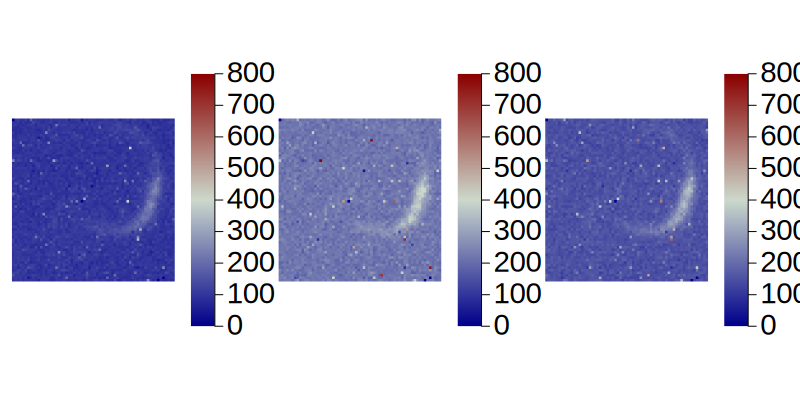

In [67]:
plot( 
    Zplot( aux01, "W", :bluesreds ),
    Zplot( aux02, "W", :bluesreds ),
    Zplot( aux03, "W", :bluesreds ),
    wsize = ( 800, 400 ),
    layout = ( 1, 3 ),
    clims = ( 0, 800 )
)

In [60]:
# data = dataPOS = dataPRE = BINMUASMOOTH;
# SpikeIndexes = SpikeIndexesMUASMOOTH;

# data = dataPOS = dataPRE = BINSMOOTH;
# SpikeIndexes = SpikeIndexesSMOOTH;

data = dataPOS = dataPRE = BINMUA
SpikeIndexes = SpikeIndexesMUA

All_Spikes = [ ];
for ch = 1:nChs
    ChannelIndexes = SpikeIndexes[ ch ];
    RightPass = findall( ( ChannelIndexes .+ Fpos ) .> RightLimit );
    LeftPass = findall( ( ChannelIndexes .- Fpre ) .< LeftLimit );
    nSpikes = length( ChannelIndexes );
    SpikesVoltage = zeros( Float64, nSpikes, ( Fpre + Fpos + 1 ) );
    OKnSpikes = setdiff( setdiff( 1:nSpikes, RightPass ), LeftPass );
    if !isempty( RightPass )
        for rp in RightPass
            A = ChannelIndexes[ rp ];
            fits = length( ( A - Fpre ) : RightLimit );
            SpikesVoltage[ rp, ( 1 : fits ) ] = data[ ch, ( ( A - Fpre ) : RightLimit ) ];
            lack = length( SpikesVoltage[ rp, ( ( fits + 1 ) : end ) ]);
            SpikesVoltage[ rp, ( ( fits + 1 ) : end ) ] = dataPOS[ ch, ( 1 : lack ) ];
        end
    end
    if !isempty( LeftPass )
        for lp in LeftPass
            A = ChannelIndexes[ lp ];
            I = abs( A - Fpre ) + 1;
            SpikesVoltage[ lp,  ( I + 1 ) : end ] = data[ ch, ( LeftLimit : ( A + Fpos ) ) ];
            SpikesVoltage[ lp, ( 1 : I ) ] = dataPRE[ ch, ( ( end - I + 1 ) : end ) ];
        end
    end
    for nSpk in OKnSpikes
        A = ChannelIndexes[ nSpk ];
        SpikesVoltage[ nSpk, : ] = data[ ch, ( A - Fpre ) : ( A + Fpos ) ];
    end
    push!( All_Spikes, SpikesVoltage );
end

In [61]:
F3 = plot( All_Spikes[ 8 ]', leg = :none );

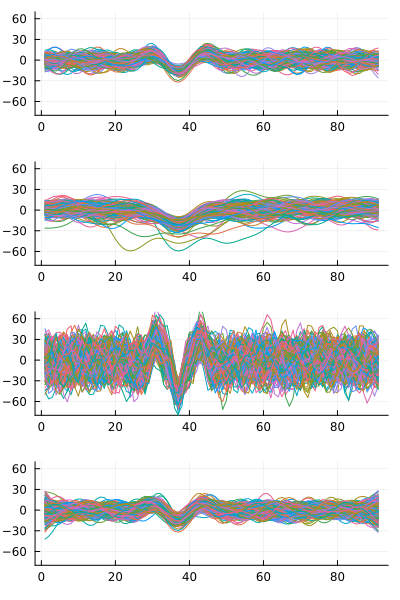

In [78]:
plot( F1, F2, F3, plot( xg'), layout = ( 4, 1 ), wsize = ( 400, 600 ), leg = :none, 
ylims = ( -80, 70))

In [71]:
x = All_Spikes[ 8 ];

xg = zeros( size(x) );
for j = 1 : size( x, 1 )
    xg[ j, : ] = GaussSmoothTemporal( vec( x[ j, : ] ), 3, "I" );
end

In [40]:
function TemporalSmoothArray( Datos::Array, Sigma = 3, Gauss = "I" )
    nChs, nFrs = size( Datos );
    side = Int( sqrt( nChs ) );
    Datos = reshape( Datos, side, side, nFrs );
    ( J, K, L )  = size( Datos );
    # We apply a Temporal Gaussian smoothing ( this greatly affects the animations )
    BINSMOOTH = zeros( J, K, L );
    for j = 1 : J, k = 1 : K
        BINSMOOTH[ j, k, : ] = GaussSmoothTemporal( vec( Datos[ j, k, : ] ), 3, "I" );
    end
    Datos = reshape( BINSMOOTH, nChs, nFrs );
    return Datos
end
function GaussSmoothTemporal( Datos::Array, Sigma = 3, Gauss = "I" )
    # Un suavizado Gaussiano temporal.
    # Esto es escencialmente un filtro pasabajos.
    # Depende implicitamente de la frecuencia de muestreo.
    # sigma esta medido en pixeles, es la desviacion estandar de nuestro kernel.
    # El A de nuestra ventana seran 3 * sigma
    A = ceil( Sigma * 3 );
    B = ones( A );
    result = zeros( size( Datos ) );
    datosB = vcat( B * Datos[ 1 ], Datos, B * Datos[ end ] );
    if Gauss == "K"
        kernel = map( x -> UnNormGaussK( x, Sigma ), collect( -A : A ) );
        kernel = kernel / ( sum( kernel ) );
    elseif Gauss == "I"
        kernel = map( x -> UnNormGaussI( x, Sigma ), collect( -A : A ) );
        kernel = kernel / ( sum( kernel ) );
    end
    for t = ( A + 1 ) : ( length( Datos ) + A )
        result[ t - A ] = sum(
            datosB[ ( t - A ) : ( t + A ) ] .* kernel );
    end
    return result
end
function UnNormGaussI( x, sigma )
    cte = ( 1 / ( sigma * sqrt( 2 * pi ) ) );
    return cte * exp( -( ( x ^ 2 ) / ( 2 * ( sigma ^ 2 ) ) ) );
end

UnNormGaussI (generic function with 1 method)